# Download Data

In [ ]:
# jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0 --notebook-dir=D:\Notebook

In [ ]:
def sheet2csv(url, save_path):
  import requests
  resp = requests.get(url)

  output = open(save_path, 'wb')
  output.write(resp.content)
  output.close()

sheet2csv(
    'https://docs.google.com/spreadsheets/d/1kCwlP_LmXQm7DBagptRPHVBBQDUMmbAAhap0nKyVFyE/export?format=csv&id=1kCwlP_LmXQm7DBagptRPHVBBQDUMmbAAhap0nKyVFyE&gid=0',
    'fakhi.csv'
    )

sheet2csv(
    'https://docs.google.com/spreadsheets/d/1kCwlP_LmXQm7DBagptRPHVBBQDUMmbAAhap0nKyVFyE/export?format=csv&id=1kCwlP_LmXQm7DBagptRPHVBBQDUMmbAAhap0nKyVFyE&gid=948461641',
    'nuel.csv'
)

sheet2csv(
    'https://docs.google.com/spreadsheets/d/1kCwlP_LmXQm7DBagptRPHVBBQDUMmbAAhap0nKyVFyE/export?format=csv&id=1kCwlP_LmXQm7DBagptRPHVBBQDUMmbAAhap0nKyVFyE&gid=1096939829',
    'ratri.csv'
)

sheet2csv(
    'https://docs.google.com/spreadsheets/d/1kCwlP_LmXQm7DBagptRPHVBBQDUMmbAAhap0nKyVFyE/export?format=csv&id=1kCwlP_LmXQm7DBagptRPHVBBQDUMmbAAhap0nKyVFyE&gid=209928702',
    'combine.csv'
)

In [ ]:
!pip install emoji

     |████████████████████████████████| 170 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=77a9f2395e85ed9ecadb70648bbf5ec39099b5898c6e4f7a058ff389b5164b46
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


#Import Library

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import re
from spacy.lang.id import STOP_WORDS
from random import randint
from tqdm import tqdm
from datetime import datetime
from time import time
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import tensorflow as tf
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential, Model
from tensorflow.keras.utils import plot_model

In [ ]:
import emoji

# Load Dataset

In [ ]:
# corr_dict = pd.read_csv('/content/drive/MyDrive/Project/Data/Twitter/Correction/UI - Emotion/kamus_singkatan.csv',  sep=';', names=[0, 1], index_col=0)[1].to_dict()
map_value = {'s': 0, 'p':1, 'n':2, 'o':0, np.nan:-1}
df = pd.read_csv('/content/combine.csv')
df['label'] = pd.read_csv('/content/combine.csv')['Arah Voting'].str.lower().str.strip().map(map_value)
df = df[df['label'] != -1]
df = df[['TWEET', 'label']]
df['full_text'] = df['TWEET']
df.drop_duplicates(['TWEET'], inplace=True)
df = df.drop(df.index[[295]]).reset_index(drop=True)
print(df.shape)
df.groupby('label').count()

(1832, 3)


,TWEET,full_text
label,,
0,965,965
1,806,806
2,61,61


In [ ]:
df.at[373, 'label'] = 1

In [ ]:
full_df = pd.read_csv('/content/drive/Shareddrives/Covid Sentiment/Full_clean_duplicate.csv')
full_df = full_df[full_df['stopword'].notnull()]

# Preprocessing

In [ ]:
def deEmojify(text):
  regrex_pattern = re.compile(pattern = "["
      u"\U0001F600-\U0001F64F"  # emoticons
      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
      u"\U0001F680-\U0001F6FF"  # transport & map symbols
      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
      u"\U00002500-\U00002BEF"  # chinese char
      u"\U00002702-\U000027B0"
      u"\U00002702-\U000027B0"
      u"\U000024C2-\U0001F251"
      u"\U0001f926-\U0001f937"
      u"\U00010000-\U0010ffff"
      u"\u2640-\u2642"
      u"\u2600-\u2B55"
      u"\u200d"
      u"\u23cf"
      u"\u23e9"
      u"\u231a"
      u"\ufe0f"  # dingbats
      u"\u3030"
                          "]+", flags = re.UNICODE)
  return regrex_pattern.sub(r'', text)

def clean(text):
  text = str(text)
  text = text.replace('&amp;', ' ')
  text = text.lower()
  text = deEmojify(text)
  text = re.sub(r'@[0-9a-z]+', ' [USERNAME] ', text)
  text = re.sub(r'#[0-9a-z]+', ' [HASHTAG] ', text)
  text = re.sub(r'http\S+', ' [URL] ', text)
  text = re.sub(r'[-]', '', text)
  text = re.sub(r'[^0-9a-z_]', ' ', text)
  text = re.sub(r'[0-9]+', ' ', text)
  return text

def clean_stopwords(text, stop_words=STOP_WORDS):
  text = str(text)
  text = text.split()
  text = [t for t in text if t not in stop_words]
  return ' '.join(text).strip()
 

In [ ]:
# df['TWEET'] = df['full_text'].apply(lambda x: emoji.demojize(str(x))).apply(clean).apply(lambda x : ' '.join(str(x).split()))
df['TWEET'] = df['full_text'].apply(clean).apply(deEmojify).apply(clean_stopwords)
df = df.drop_duplicates(['TWEET']).reset_index(drop=True)
# full_df['clean'] = full_df['full_text'].apply(lambda x: emoji.demojize(str(x))).apply(clean).apply(lambda x : ' '.join(str(x).split()))

# EDA

In [ ]:
cv = CountVectorizer()
vec = cv.fit_transform(df['TWEET'])
sim = cosine_similarity(vec)
sim.shape

(1774, 1774)

In [ ]:
sim_ = np.where(sim > 0.9)
print(len(sim_[0]), len(sim_[1]), len(sim_[0]) == len(sim_[1]), ( float(len(sim_[0])) - sim.shape[0])/2)

1798 1798 True 12.0


In [ ]:
X, Y = sim_

In [ ]:
same_arr = [np.sort(x) for x in zip(X, Y) if x[0]!=x[1]]
np.unique(same_arr, axis=0)

array([[ 284,  286],
       [ 312,  556],
       [ 418,  420],
       [ 418,  521],
       [ 420,  521],
       [ 455,  456],
       [ 456,  457],
       [ 457, 1271],
       [ 516,  517],
       [ 549, 1636],
       [1396, 1681],
       [1416, 1417]])

In [ ]:
np.sum(sim >0.9999)

1776

In [ ]:
sim.shape

(1774, 1774)

# Convert to Vector

In [ ]:
# arr = full_df['clean'].str.split().tolist() + df['TWEET'].str.split().tolist()

In [ ]:
# for a in arr:
#   try:
#     len(a)
#   except Exception as e:
#     print(a, e)

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
# dim = 250
# model = Word2Vec(sentences=arr, size=dim, window=5, min_count=1, workers=4, sg=1)
# model.save('/content/drive/Shareddrives/Covid Sentiment/model/skip-gram/skipgram.model')
# model = Word2Vec.load('/content/drive/Shareddrives/Covid Sentiment/model/skip-gram/skipgram.model')

# model = Word2Vec(sentences=arr, size=300, window=5, min_count=1, workers=4, sg=0)
# model.save('/content/drive/Shareddrives/Covid Sentiment/model/cbow/cbow.model')
model = Word2Vec.load('/content/drive/Shareddrives/Covid Sentiment/model/cbow/cbow.model')


In [ ]:
sent_vec = [model.wv[t.split()] for t in df['TWEET']]
maxlen = max([len(sent_vec[i]) for i in range(len(sent_vec))])
sent_vec_ = pad_sequences(sent_vec, maxlen=maxlen, dtype=float)
sent_vec_.shape

(1774, 49, 300)

# Training

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(sent_vec_, df['label'], stratify=df['label'], random_state=17)
X_train, X_test, y_train, y_test = train_test_split(sent_vec_, df['label'], random_state=17)


In [ ]:
class IdentityBlock(Model):
  def __init__(self, out, kernel, num, input_conv=False):
    super(IdentityBlock, self).__init__()
    self.blocks = [Conv1D(out, kernel, padding='same') for i in range(num)]
    self.normals = [BatchNormalization() for i in range(num)]
    if input_conv:
      self.conv = Conv1D(out, kernel, padding='same')
      self.norm = BatchNormalization()
    self.act = Activation('relu')
    self.add = Add()

    self.num = num
    self.input_conv = input_conv

  def call(self, input_tensor):
    # print(input_tensor.shape)
    x = self.blocks[0](input_tensor)
    # print(x.shape)
    x = self.normals[0](x)
    x = self.act(x)
    for i in range(1, self.num):
      x = self.blocks[i](x)
      x = self.normals[i](x)
      x = self.act(x)
    if self.input_conv:
      input_tensor = self.conv(input_tensor)
      input_tensor = self.norm(input_tensor)
    x = self.add([x, input_tensor])
    return self.act(x)

In [ ]:
class ResNetPart(Model):
  def __init__(self, filter, kernel, num, repetition, change_first=True):
    super(ResNetPart, self).__init__()
    self.Is = [IdentityBlock(filter, kernel, num, change_first)] + [IdentityBlock(filter, kernel, num) for i in range(repetition-1)]

  def call(self, input_tensor):

    x = self.Is[0](input_tensor)
    for b in self.Is[1:]:
      x = b(x)

    return x

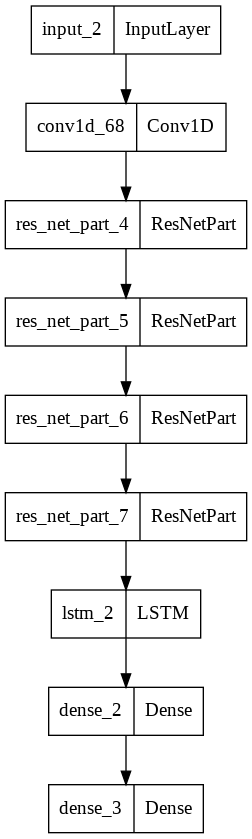

In [ ]:
classifier = Sequential(
    [
     Input(shape=(maxlen, 300)),
     Conv1D(64, 7, padding='same'),
     ResNetPart(64, 3, 3, 3, False),
     ResNetPart(128, 3, 4, 4),
     ResNetPart(256, 3, 5, 6),
     ResNetPart(512, 3, 3, 3),
    #  GlobalAveragePooling1D(),
     LSTM(256),
     Dense(128),
     Dense(3, activation='sigmoid')
    ]
)
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# classifier.summary()
plot_model(classifier)

In [ ]:
history = classifier.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
42/42 [==============================] - 380s 7s/step - loss: 0.9135 - accuracy: 0.5368 - val_loss: 0.7863 - val_accuracy: 0.5698
Epoch 2/10
42/42 [==============================] - 204s 5s/step - loss: 0.8052 - accuracy: 0.5556 - val_loss: 0.7931 - val_accuracy: 0.5788
Epoch 3/10
42/42 [==============================] - 202s 5s/step - loss: 0.7382 - accuracy: 0.6541 - val_loss: 0.7644 - val_accuracy: 0.6554
Epoch 4/10
42/42 [==============================] - 202s 5s/step - loss: 0.7049 - accuracy: 0.6872 - val_loss: 0.7604 - val_accuracy: 0.6599
Epoch 5/10
42/42 [==============================] - 204s 5s/step - loss: 0.6628 - accuracy: 0.7301 - val_loss: 0.7618 - val_accuracy: 0.6622
Epoch 6/10
42/42 [==============================] - 203s 5s/step - loss: 0.5944 - accuracy: 0.7842 - val_loss: 0.7702 - val_accuracy: 0.6667
Epoch 7/10
42/42 [==============================] - 217s 5s/step - loss: 0.6070 - accuracy: 0.7729 - val_loss: 0.8434 - val_accuracy: 0.6396
Epoch 8/10
42